# Importação de bibliotecas

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from classifiers.bayesian_classifier import BayesianGaussianClassifier
from utils.classifier_utils import ClassifierUtils
from utils.dataset_utils import DatasetUtils
from utils.image_generator import ImageGenerator

# Definição de constantes

In [2]:
np.random.seed(42)
CLASSIFIER_NAME = "Bayesian Gaussian"
TARGET_COLUMN_NAME = "class"
DATASET_NAME = "Coluna"
TEST_SIZE = 0.2
HOLDOUT_INDEXES_NUMBER = 200
FIG_SIZE = (12, 10)
IMAGE_FONT_SIZE = 20
RESOLUTION_POINTS = 1000

# Baixando dataset Coluna

In [3]:
vertebral_column = fetch_ucirepo(id=212)

X_coluna = vertebral_column.data.features
y_coluna = vertebral_column.data.targets

coluna_df = pd.concat([X_coluna, y_coluna], axis="columns")

In [4]:
list(coluna_df[TARGET_COLUMN_NAME].unique())

['Hernia', 'Spondylolisthesis', 'Normal']

# Redefinindo classes para valores numéricos

In [5]:
class_mapping = {"Hernia": 0, "Spondylolisthesis": 1, "Normal": 2}
coluna_df[TARGET_COLUMN_NAME] = coluna_df[TARGET_COLUMN_NAME].map(class_mapping)
coluna_df[TARGET_COLUMN_NAME]

0      0
1      0
2      0
3      0
4      0
      ..
305    2
306    2
307    2
308    2
309    2
Name: class, Length: 310, dtype: int64

# Treinamento e avaliação dos modelos, juntamente com a criação de tabela de métricas para o classificador Bayesiano

In [6]:
bayesian_holdout_indexes = ClassifierUtils.create_multiple_holdout_indexes(
    df=coluna_df, n_indexes=HOLDOUT_INDEXES_NUMBER, test_size=TEST_SIZE
)

bayesian_accuracy_list = []

for train_indexes, test_indexes in bayesian_holdout_indexes:
    X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
        df=coluna_df,
        train_indexes=train_indexes,
        test_indexes=test_indexes,
        target_column_name=TARGET_COLUMN_NAME,
    )

    classifier = BayesianGaussianClassifier(normalization=True)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test=X_test)

    accuracy = ClassifierUtils.calculate_accuracy(y_true=y_test, y_pred=y_pred)
    error_rate = ClassifierUtils.calculate_error_rate(y_true=y_test, y_pred=y_pred)

    confusion_matrix_result = ClassifierUtils.confusion_matrix(
        y_true=y_test, y_pred=y_pred
    )

    bayesian_accuracy_list.append(
        (
            accuracy,
            error_rate,
            train_indexes,
            test_indexes,
            y_pred,
            confusion_matrix_result,
        )
    )

bayesian_df_results = pd.DataFrame(
    bayesian_accuracy_list,
    columns=[
        "accuracy",
        "error_rate",
        "train_indexes",
        "test_indexes",
        "y_pred",
        "confusion_matrix",
    ],
)

bayesian_df_results

,accuracy,error_rate,train_indexes,test_indexes,y_pred,confusion_matrix
0,0.838710,0.161290,"[289, 9, 57, 60, 25, 63, 92, 184, 244, 46, 75,...","[1, 130, 257, 134, 263, 264, 13, 14, 270, 271,...","[0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, ...","[[12, 0, 3], [1, 26, 0], [4, 2, 14]]"
1,0.822581,0.177419,"[242, 244, 216, 213, 44, 236, 164, 77, 40, 145...","[3, 255, 5, 12, 141, 142, 16, 17, 146, 19, 272...","[0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, ...","[[12, 0, 4], [0, 31, 0], [4, 3, 8]]"
2,0.806452,0.193548,"[173, 70, 245, 249, 288, 167, 277, 280, 106, 9...","[0, 258, 4, 133, 7, 135, 9, 11, 13, 142, 143, ...","[0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, ...","[[12, 1, 4], [0, 25, 0], [4, 3, 13]]"
3,0.838710,0.161290,"[5, 200, 8, 11, 47, 153, 198, 159, 267, 194, 1...","[0, 129, 258, 131, 4, 132, 260, 262, 136, 9, 1...","[0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, ...","[[10, 1, 1], [0, 31, 2], [5, 1, 11]]"
4,0.870968,0.129032,"[297, 0, 30, 175, 123, 109, 21, 187, 263, 105,...","[3, 255, 133, 260, 8, 137, 13, 16, 144, 145, 1...","[0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 2, ...","[[9, 0, 4], [0, 26, 0], [1, 3, 19]]"
...,...,...,...,...,...,...
195,0.887097,0.112903,"[69, 80, 168, 96, 293, 215, 276, 287, 70, 134,...","[128, 129, 257, 259, 6, 7, 138, 142, 143, 273,...","[1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 1, 2, ...","[[8, 0, 2], [1, 32, 0], [4, 0, 15]]"
196,0.887097,0.112903,"[186, 22, 137, 39, 81, 295, 95, 296, 279, 32, ...","[129, 132, 134, 136, 265, 138, 269, 15, 19, 20...","[1, 1, 1, 1, 2, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0, ...","[[7, 0, 2], [0, 29, 0], [5, 0, 19]]"
197,0.870968,0.129032,"[248, 3, 200, 105, 154, 17, 26, 13, 238, 56, 1...","[0, 256, 130, 6, 262, 144, 274, 147, 277, 24, ...","[0, 2, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 0, 0, 1, ...","[[10, 0, 1], [0, 27, 0], [6, 1, 17]]"
198,0.887097,0.112903,"[302, 223, 150, 269, 164, 194, 91, 93, 309, 25...","[1, 2, 257, 259, 133, 6, 135, 8, 260, 138, 15,...","[0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, ...","[[7, 0, 5], [0, 27, 0], [2, 0, 21]]"


# Vetor de acurácias

In [7]:
bayesian_accuracy_vector = pd.Series(bayesian_df_results["accuracy"])

In [8]:
bayesian_accuracy_vector

0      0.838710
1      0.822581
2      0.806452
3      0.838710
4      0.870968
         ...   
195    0.887097
196    0.887097
197    0.870968
198    0.887097
199    0.822581
Name: accuracy, Length: 200, dtype: float64

# Definindo gerador de imagens

In [9]:
image_generator = ImageGenerator(figure_size=FIG_SIZE, font_size=IMAGE_FONT_SIZE)

# Boxplot das acurácias do classificador Bayesiano

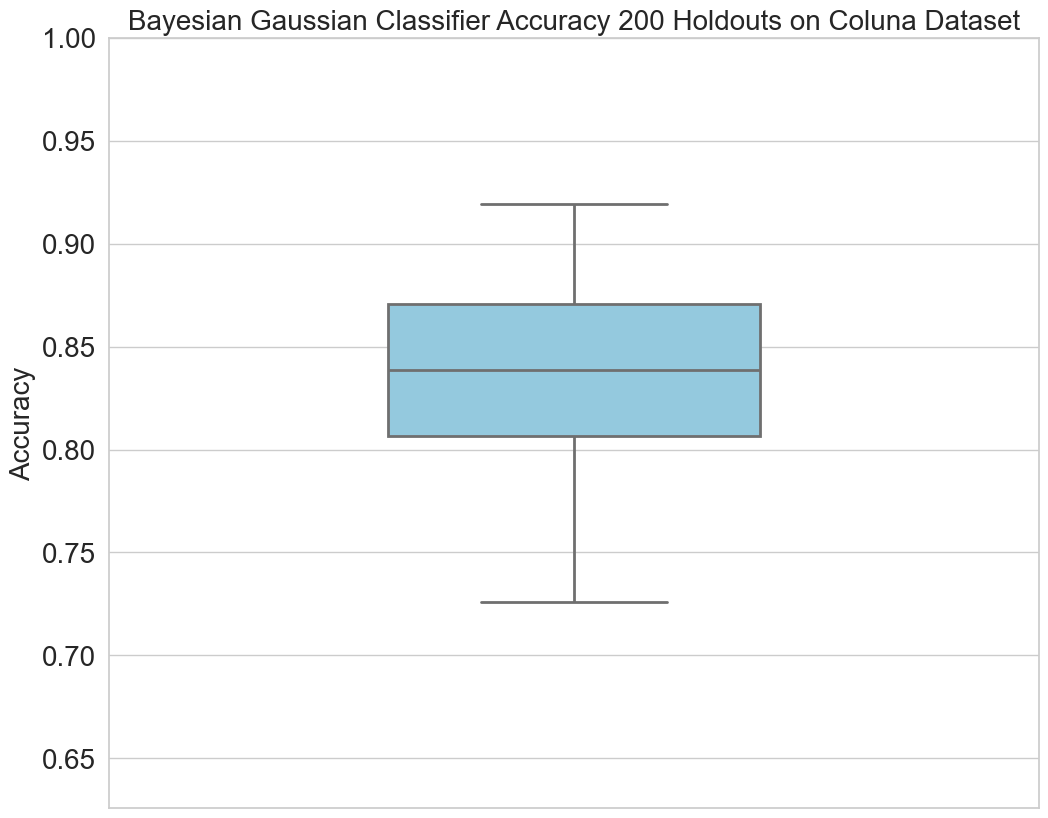

In [10]:
image_generator.create_boxplot(
    vector_distribution=bayesian_accuracy_vector,
    y_label="Accuracy",
    image_title=f"{CLASSIFIER_NAME} Classifier Accuracy {HOLDOUT_INDEXES_NUMBER} Holdouts on {DATASET_NAME} Dataset",
    path_to_save="../../data/images/atividade_2/coluna_bayesian_accuracy_boxplot.jpeg",
    show=True,
)

# Baseado na melhor acurácia, pego os índices de treino e teste que geraram ela e calculo a superfície de decisão e também resgato a sua respectiva matriz de confusão

In [11]:
max_accuracy = bayesian_df_results["accuracy"].max()
indexes_of_max_accuracy = bayesian_df_results[
    bayesian_df_results["accuracy"] == max_accuracy
].index.tolist()

index_selected = np.random.choice(indexes_of_max_accuracy)

print(f"Índice(s) com melhor acurácia: {indexes_of_max_accuracy}")
print(f"Índice selecionado aleatoriamente: {index_selected}")
print(f"Acurácia do índice selecionado: {max_accuracy * 100:.2f}%")

best_accuracy_train_indexes = bayesian_df_results.loc[index_selected, "train_indexes"]
best_accuracy_test_indexes = bayesian_df_results.loc[index_selected, "test_indexes"]

X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
    df=coluna_df,
    train_indexes=best_accuracy_train_indexes,
    test_indexes=best_accuracy_test_indexes,
    target_column_name=TARGET_COLUMN_NAME,
)

Índice(s) com melhor acurácia: [9, 53, 65, 135]
Índice selecionado aleatoriamente: 65
Acurácia do índice selecionado: 91.94%


# Resgatando a matriz de confusão e plotando ela

In [12]:
confusion_matrix_result = bayesian_df_results.loc[index_selected, "confusion_matrix"]

In [13]:
confusion_matrix_result

array([[ 7,  0,  1],
       [ 0, 31,  0],
       [ 3,  1, 19]])

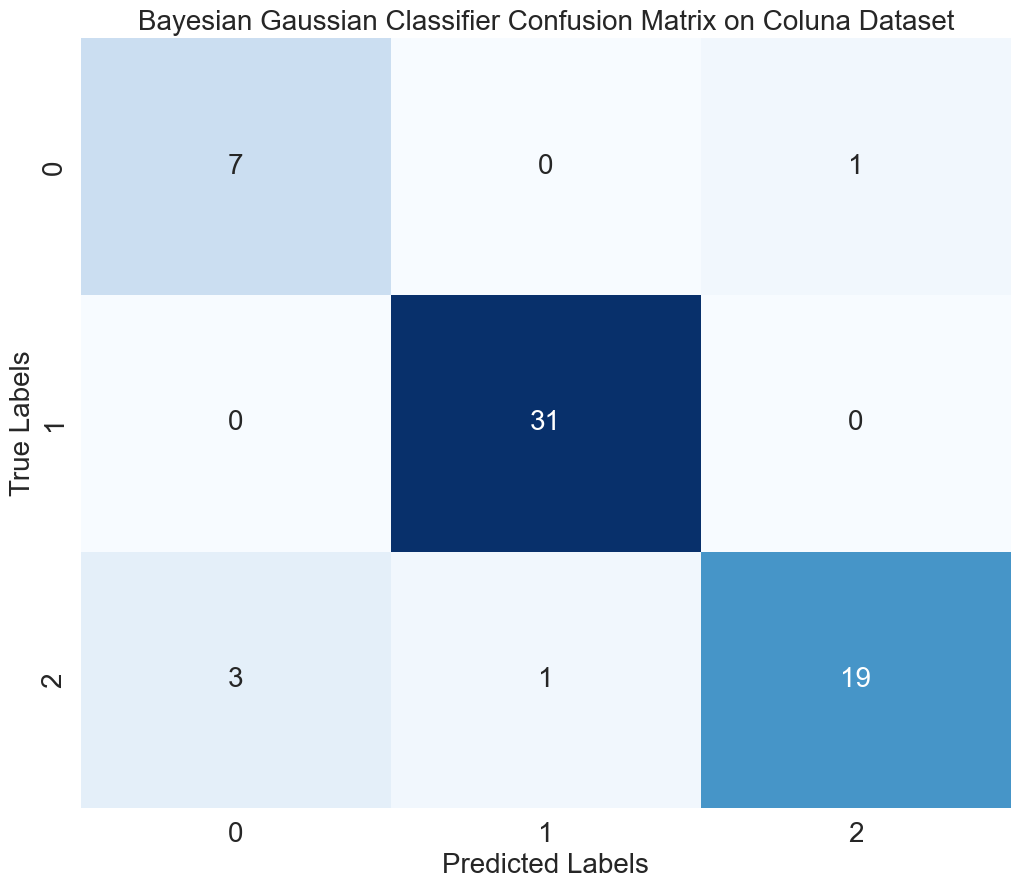

In [14]:
image_generator.create_confusion_matrix_heatmap(
    confusion_matrix=confusion_matrix_result,
    x_label="Predicted Labels",
    y_label="True Labels",
    image_title=f"{CLASSIFIER_NAME} Classifier Confusion Matrix on {DATASET_NAME} Dataset",
    path_to_save="../../data/images/atividade_2/coluna_bayesian_confusion_matrix.jpeg",
    show=True,
)

# Calculo de superfície de decisão para o classificador Bayesiano baseado em duas features

In [15]:
feature_x = X_train.columns[0]
feature_y = X_train.columns[1]

test_grid, x_shape, y_shape = DatasetUtils.create_test_grid(
    X_train=X_train,
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    return_shapes=True,
)

classifier = BayesianGaussianClassifier(normalization=True)
classifier.fit(X_train[[feature_x, feature_y]], y_train)

y_pred_test_grid = classifier.predict(test_grid)

y_pred_test_grid = y_pred_test_grid.reshape(x_shape)

# Plot da superfície de decisão para o classificador Bayesiano

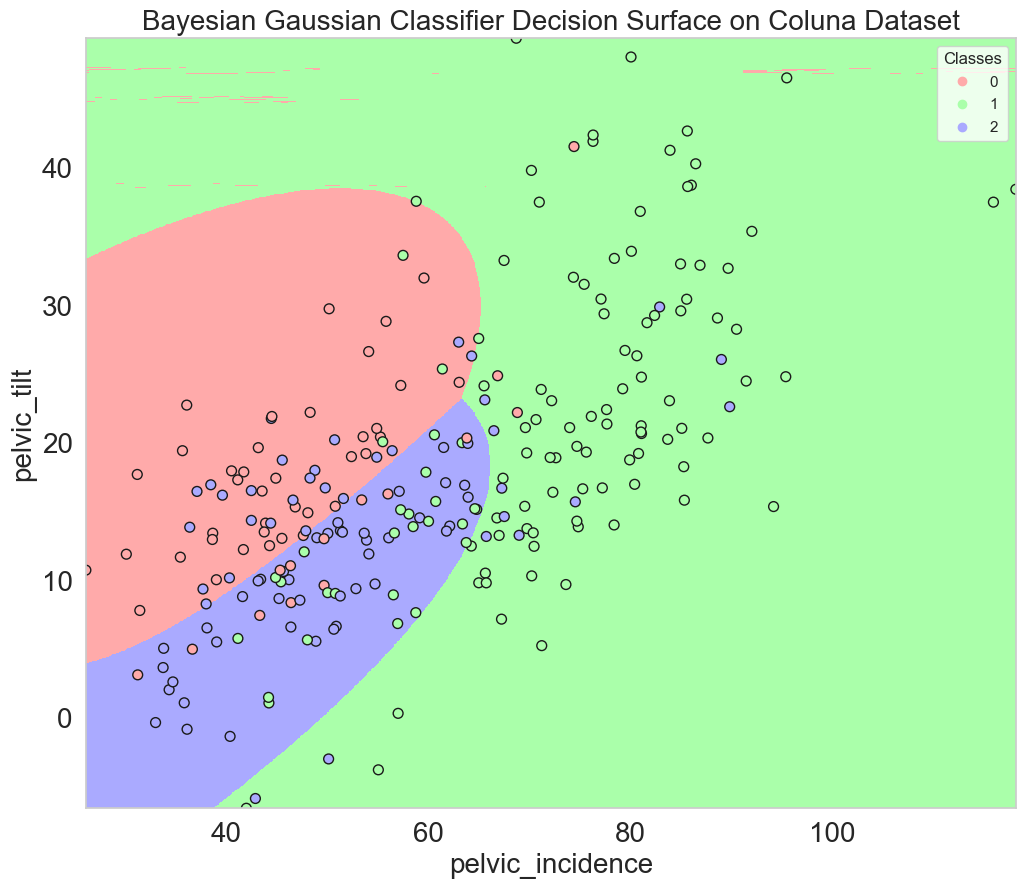

In [16]:
image_generator.create_decision_surface(
    X_train=X_train,
    y_train=y_train,
    y_pred=y_pred_test_grid,
    image_title=f"{CLASSIFIER_NAME} Classifier Decision Surface on {DATASET_NAME} Dataset",
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    path_to_save="../../data/images/atividade_2/coluna_bayesian_decision_surface.jpeg",
    show=True,
)